In [81]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress

import gmaps

# Google developer API key
from config import gkey


In [82]:
# Study data files
data_file1 = "Resources/Table 43a.xlsx"
data_file2 = "Resources/Population.xlsx"

In [83]:
# Configure gmaps
gmaps.configure(api_key=gkey)

In [84]:
# ******We don't need Sheet to read as we have already manually delete other sheets*******
#data_file1_df = pd.read_excel(open(data_file1, 'rb'), sheet_name= "Sheet1")

## Read the Full-time Equivalent Students, 2006-2020  data file
data_file1_df = pd.read_excel(data_file1)

# Display the data table for preview
data_file1_df.head(10)

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
5,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,f Year 5,2769.0,32509.0,35278.0
6,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,g Year 6,2826.0,32077.0,34903.0
7,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,i Ungraded primary,240.0,1445.0,1685.0
8,2020,a NSW,a Government,a Government,a Full-time,a Male,b Secondary School,b Junior Secondary School,j Year 7 secondary,2877.0,27715.0,30592.0
9,2020,a NSW,a Government,a Government,a Full-time,a Male,b Secondary School,b Junior Secondary School,k Year 8,2706.0,27316.0,30022.0


****************************************** DATA CLEANSING*****************************************************

In [85]:
# Identify incomplete rows, As in the result there are no empty rows,therefore we do not need to drop any rows.
data_file1_df.count()

Year                                                   14143
State/Territory                                        14143
Affiliation (Gov/Non-gov)                              14143
Affiliation (Gov/Cath/Ind)                             14143
FT/PT                                                  14143
Sex                                                    14143
School Level                                           14143
National Report on Schooling (ANR) School Level        14143
Year (Grade)                                           14143
FTE Aboriginal and Torres Strait Islander Students     14143
FTE Non-Indigenous Students                            14143
FTE All Students                                       14143
dtype: int64

In [86]:
#check the column headers
data_file1_df.columns

Index(['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students '],
      dtype='object')

In [87]:
def func(x):
    print(x)
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [88]:
#Split column data to remove prefixes in each column
split_columns_data_file1_df = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level","National Report on Schooling (ANR) School Level","Year (Grade)"]
for column in split_columns_data_file1_df:
    data_file1_df[column] = data_file1_df[column].apply(lambda x: func(x))




a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
a NSW
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b 

c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d

f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
f Tas.
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
g NT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT
h ACT

b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
b Vic.
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld
c Qld

d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
d SA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA
e WA


a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-gove

b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-governme

b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-governme

b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
b Non-government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a 

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Indep

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b 

b Catholic
b Catholic
b Catholic
b Catholic
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Cath

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
c Independent

a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
a Government
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
b Catholic
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Independent
c Inde

a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Pa

a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Fu

a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Fu

b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
b Part-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Full-time
a Fu

b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Fema

b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female


b Female
b Female
b Female
b Female
a Male
a Male
a Male
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male


a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
b Female
b Female
b Female
b Female
b Female
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Male
a Ma

a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secon

b Secondary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
b Secondary School
b Secondary School
a Primary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary Sch

b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School


b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary

b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
b Secondary School
a Primary School
a Primary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
b Secondary School
a Primary School
a Prima

b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary S

b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary S

a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Sec

a Primary School
a Primary School
b Junior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
b Junior Secondary School
c Senior Secondary School
c Senior Secondary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
a Primary School
b Junior Secondary School
b Junior Secondary School
b J

d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
c Year 2
e Year 4
j Year 7 secondary
l Year 9
n Year 11
o Year 12
e Year 4
k Year 8
l Year 9
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
i Ungraded primary
j Year 7 secondary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
i Ungraded primary
j Year 7 secondary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
d Year 3
f Year 5
i Ungraded primary
k Year 8
m Year 10
p Ungraded secondary
n Year 11
o Year 12
i Ungraded primary
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Founda

b Year 1
c Year 2
e Year 4
g Year 6
l Year 9
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
l Year 9
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
b Year 1
f Year 5
k Year 8
l Year 9
a Pre-Year 1 (Foundation Year)
e Year 4
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
i Ungraded primary
j Year 7 secondary
k Year 8
l Year 9
m Year 10
p U

o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
f Year 5
g Year 6
i Ungraded primary
l Year 9
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
h Year 7 primary
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d 

k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
c Year 2
f Year 5
i Ungraded primary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
i Ungraded primary
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
a Pre-Year 1 (Foundation Year)
b Year 1
c Year 2
d Year 3
e Year 4
f Year 5
g Year 6
j Year 7 secondary
k Year 8
l Year 9
m Year 10
p Ungraded secondary
n Year 11
o Year 12
n Year 11
o Year 12
o Year 12
a Pr

In [89]:
#show data frame after removing all prefixes
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [90]:
# Display a statistical overview of the DataFrame
data_file1_df.describe()

,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
count,14143.000000,14143.000000,14143.00000,14143.000000
mean,2012.959202,197.264852,3680.44878,3877.713632
std,4.296281,447.751865,6268.03617,6637.495635
min,2006.000000,0.000000,0.00000,0.100000
25%,2009.000000,1.400000,25.00000,28.800000
50%,2013.000000,28.000000,708.00000,955.000000
75%,2017.000000,148.000000,5000.00000,5140.500000
max,2020.000000,3153.000000,34490.00000,37589.000000


In [91]:
#Verify the column types
data_file1_df.dtypes

Year                                                     int64
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [92]:
# Converting the "Year" column's values to String
converted_data_file1_df = data_file1_df.copy()
converted_data_file1_df["Year"] = converted_data_file1_df.loc[:, "Year"].astype(str)

In [93]:
#double checking the Year type after conversion
converted_data_file1_df.dtypes

Year                                                    object
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [94]:
# Delete additional column
#del converted_data_file1_df['FT/PT']
#converted_data_file1_df.head()

In [95]:
#Filter the data to get last five year data- 2016 to 2020
Last_five_years_data_df = converted_data_file1_df.loc[(converted_data_file1_df["Year"] == "2016") |(converted_data_file1_df["Year"] == "2017") | (converted_data_file1_df["Year"] == "2018") | (converted_data_file1_df["Year"] == "2019") | (converted_data_file1_df["Year"] == "2020")]
Last_five_years_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4610,2016,ACT,Non-government,Independent,Full-time,Female,School,School,12,4.0,354.0,358.0
4611,2016,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,2.2,2.2
4612,2016,ACT,Non-government,Independent,Part-time,Male,School,School,3,0.0,2.1,2.1
4613,2016,ACT,Non-government,Independent,Part-time,Male,School,School,6,0.0,2.4,2.4


*************************************END OF CLEANSING PROCESS*************************************************************

In [96]:
#Question 1: What is the number and percentage of student enrolment by state in last 5 years (2016-2020)?
# use Bar Graph and Pie charts


In [97]:
# Using GroupBy in order to separate the data into fields according to "state" values
# and calculate the tota enrolments by state for last five years
#The visual representaion of total enrolments ----Bar graph and Pie chart
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count()


,Year,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
State/Territory,,,,,,,,,,,
ACT,459,459,459,459,459,459,459,459,459,459,459
NSW,550,550,550,550,550,550,550,550,550,550,550
NT,521,521,521,521,521,521,521,521,521,521,521
Qld,660,660,660,660,660,660,660,660,660,660,660
SA,638,638,638,638,638,638,638,638,638,638,638
Tas.,497,497,497,497,497,497,497,497,497,497,497
Vic.,796,796,796,796,796,796,796,796,796,796,796
WA,494,494,494,494,494,494,494,494,494,494,494


In [120]:
#Find the total number of Enrolements by state for last five years. 
total_Enrolments_by_State= Group_by_last_five_years['FTE All Students '].sum()
total_Enrolments_by_State
Y=total_Enrolments_by_State.sort_values()
X=Y.reset_index()
X


,State/Territory,FTE All Students
0,NT,204403.0
1,ACT,354313.8
2,Tas.,405733.5
3,SA,1343161.1
4,WA,2091911.8
5,Qld,4115583.8
6,Vic.,4851464.7
7,NSW,6094245.4


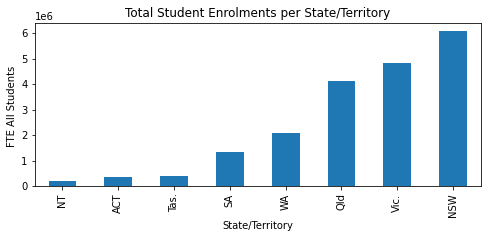

<Figure size 432x288 with 0 Axes>

In [121]:
#Display the result in a Bar graph
bar_plot = Y.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()
plt.tight_layout()

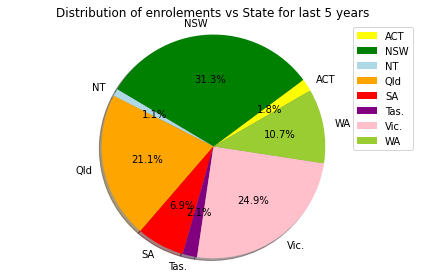

In [122]:
# Generate a pie plot showing the distribution of enrolement percentage versus state using pyplot
labels = ["ACT","NSW","NT","Qld","SA","Tas.","Vic.","WA"]
sizes = [354313.8,6094245.4,204403,4115583.8,1343161.1,405733.5,4851464.7,2091911.8]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,0,0,0)

plt.pie(sizes,explode=explode,labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=750)
plt.legend()

plt.title("Distribution of enrolements vs State for last 5 years")

plt.axis("equal")
plt.tight_layout()




In [127]:
# Calculate the total enrolemnts for all states for last five years
Total_enrolements=round(X['FTE All Students '].sum(),1)
Total_enrolements


19460817.1

In [129]:
#Put all the Total Enroment totals by State and the enrolment percerntages in to a one table

Enrolment_percentage=(total_Enrolments_by_State/Total_enrolements)*100
Enrolment_percentage

index_Enr_by_state["Enrolment as a percentage"]=Enrolment_percentage
index_Enr_by_state
sort_index_Enr_by_state=index_Enr_by_state.sort_values("FTE All Students ")
index_Enr_by_state.set_index("State/Territory")

,FTE All Students,Enrolment as a percentage
State/Territory,,
ACT,354313.8,NaN
NSW,6094245.4,NaN
NT,204403.0,NaN
Qld,4115583.8,NaN
SA,1343161.1,NaN
Tas.,405733.5,NaN
Vic.,4851464.7,NaN
WA,2091911.8,NaN


*************************************************************************************

In [26]:
#Results by yearly basis , Year by State by total enrolements for last five years
Group_by_Year_state= Last_five_years_data_df.groupby(['Year','State/Territory'])
Group_by_Year_state
#Group_by_Year_state.count()

In [27]:
#Find the total number of Enrolements by Year by state for last five years. 
total_Enrtmnts_by_Year_State= Group_by_Year_state['FTE All Students '].sum()
total_Enrtmnts_by_Year_State.reset_index().head(12)


,Year,State/Territory,FTE All Students
0,2016,ACT,67603.4
1,2016,NSW,1194187.6
2,2016,NT,41069.1
3,2016,Qld,797457.8
4,2016,SA,264791.3
5,2016,Tas.,80615.9
6,2016,Vic.,932608.4
7,2016,WA,408082.9
8,2017,ACT,69313.0
9,2017,NSW,1208470.1


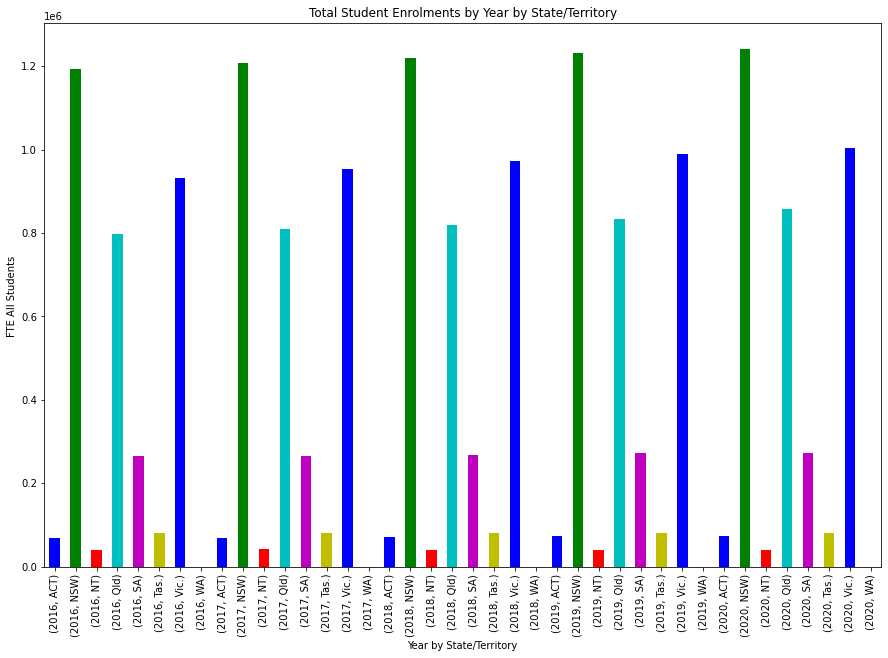

<Figure size 432x288 with 0 Axes>

In [28]:
#Display the result in a Bar graph
#****** Just need to find a way to put this by groups *********** 

bar_plot = total_Enrtmnts_by_Year_State.plot (color=list('bgrcmybw'),kind = "bar", figsize=(15,10))
plt.title('Total Student Enrolments by Year by State/Territory')
plt.xlabel('Year by State/Territory')
plt.ylabel('FTE All Students ')
plt.show()
plt.tight_layout()



In [29]:
#**********************************02) Percentage of enrolment by state in a pie chart- bar graph*********************
# this has been done under question 1

In [30]:
#***************02) number of Enrolments by Affiliation - last 5 years (2015-2020)**********************************
#***************Bar graph and Pie chart visualisation**********************************************

In [31]:
Last_five_years_data_df.head()

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0


In [32]:
#Total enrolments by Affiliation for last five years, first grouped the dtata by Affiliation (Gov/Cath/Ind)
Group_by_Affiliation= Last_five_years_data_df.groupby(['Affiliation (Gov/Cath/Ind)'])
#Group_by_Affiliation
Group_by_Affiliation.count()

,Year,State/Territory,Affiliation (Gov/Non-gov),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
Affiliation (Gov/Cath/Ind),,,,,,,,,,,
Catholic,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377
Government,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Independent,1497,1497,1497,1497,1497,1497,1497,1497,1497,1497,1497


In [33]:
#Now use the above grouped data to find total enrolements by Affiliation
total_Enrtmnts_by_Affiliation= Group_by_Affiliation['FTE All Students '].sum()
total_Enrtmnts_by_Affiliation.reset_index()


,Affiliation (Gov/Cath/Ind),FTE All Students
0,Catholic,3846869.8
1,Government,12757741.0
2,Independent,2856206.3


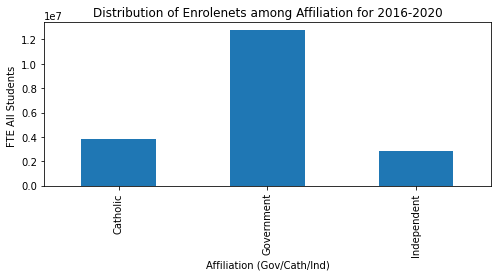

<Figure size 432x288 with 0 Axes>

In [34]:
#Display the result in a Bar graph - Overall enrolments by Affiliation for last five years every state
bar_plot = total_Enrtmnts_by_Affiliation.plot (kind = "bar", figsize=(8,3))
plt.title('Distribution of Enrolenets among Affiliation for 2016-2020')
plt.xlabel('Affiliation (Gov/Cath/Ind)')
plt.ylabel('FTE All Students ')
plt.show()
plt.tight_layout()

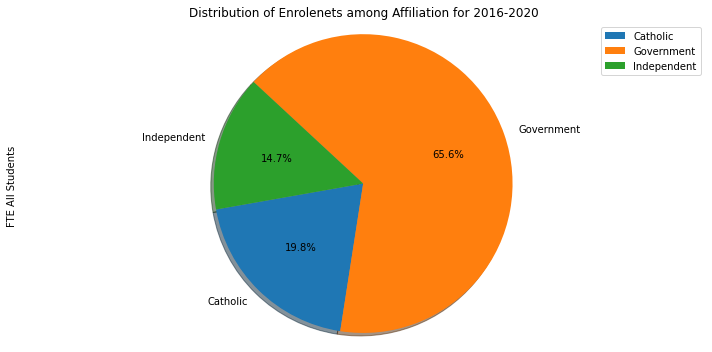

In [35]:
#Result shows in a bar graph
#show pie plot
total_Enrtmnts_by_Affiliation.plot(kind="pie",y="Affiliation (Gov/Cath/Ind)",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))

plt.title("Distribution of Enrolenets among Affiliation for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.legend()
#plt.pie(sizes,explode=explode,labels = labels, colors = colors,
 #      autopct = "%1.1f%%", shadow=True, startangle=750)

In [36]:
#Total enrolments by State by Affiliation for last five years,grouped the data by Affiliation (Gov/Cath/Ind) and the state
Group_by_State_Affiliation= Last_five_years_data_df.groupby(['State/Territory','Affiliation (Gov/Cath/Ind)'])
Group_by_State_Affiliation
#Group_by_State_Affiliation.count()

#Now use the above grouped data to find total enrolements by Affiliation
total_Enrtmnts_by_State_Affiliation= pd.DataFrame(Group_by_State_Affiliation['FTE All Students '].sum())
Z=total_Enrtmnts_by_State_Affiliation.reset_index()
Z.head(12)


,State/Territory,Affiliation (Gov/Cath/Ind),FTE All Students
0,ACT,Catholic,89357.6
1,ACT,Government,215015.2
2,ACT,Independent,49941.0
3,NSW,Catholic,1279264.6
4,NSW,Government,3985411.5
5,NSW,Independent,829569.3
6,NT,Catholic,24572.4
7,NT,Government,149567.3
8,NT,Independent,30263.3
9,Qld,Catholic,742543.1


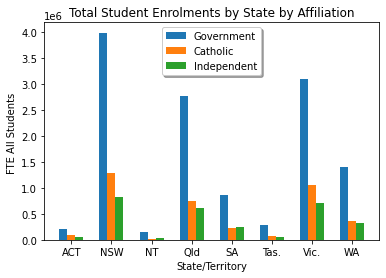

<Figure size 432x288 with 0 Axes>

In [37]:
#put the result into a bar graph
#refer https://www.youtube.com/watch?v=ZjQCPMO7LBE

x=["ACT","NSW","NT","Qld","SA","Tas.","Vic.","WA"]
w=0.2

Government=[215015.2,3985411.5,149567.3,2761243.2,869994.1,283310.3,3090539.7,1402659.7]
Catholic=[89357.6,1279264.6,24572.4,742543.1,230129,74905.1,1045634.3,360463.7]
Independent=[49941,829569.3,30263.3,611797.5,243038,47518.1,715290.7,328788.4]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,Government,w,label="Government")
plt.bar(bar2,Catholic,w,label="Catholic")
plt.bar(bar3,Independent,w,label="Independent")

plt.xlabel("State/Territory")
plt.ylabel("FTE All Students ")
plt.title('Total Student Enrolments by State by Affiliation')
plt.xticks(bar1+w,x)
plt.legend(('Government','Catholic','Independent'),loc='upper center', shadow=True)
plt.show()
plt.tight_layout()


In [38]:
#************04) percentage of Indigenous vs non Indigenous enrolment by states - Pie chart


In [39]:
Last_five_years_data_df.head()

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0


In [40]:
#Total enrolments of Indigenous enrolment by state
Group_by_Aboriginal= Last_five_years_data_df.groupby(['State/Territory'])
Group_by_Aboriginal.count()

#Now use the above grouped data to find total enrolements of Aboriginal and Torres Strait Islander
Aboriginal_Enrtmnts_by_State= Group_by_Aboriginal['FTE Aboriginal and Torres Strait Islander Students ','FTE Non-Indigenous Students '].sum()
Aboriginal_Enrtmnts_by_State.reset_index("State/Territory")



C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8004/3808679188.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Aboriginal_Enrtmnts_by_State= Group_by_Aboriginal['FTE Aboriginal and Torres Strait Islander Students ','FTE Non-Indigenous Students '].sum()


,State/Territory,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students
0,ACT,10745.4,343568.4
1,NSW,367193.5,5727051.9
2,NT,80605.0,123797.9
3,Qld,335392.3,3780191.5
4,SA,64131.6,1279029.6
5,Tas.,36531.1,369202.4
6,Vic.,81320.9,4770143.8
7,WA,137022.4,1954889.4


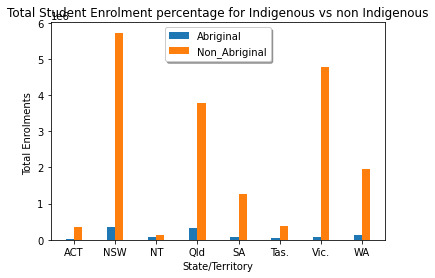

<Figure size 432x288 with 0 Axes>

In [41]:
#put the result into a bar graph
#refer https://www.youtube.com/watch?v=ZjQCPMO7LBE

x=["ACT","NSW","NT","Qld","SA","Tas.","Vic.","WA"]
w=0.2

Abriginal=[10745.4,367193.5,80605,335392.3,64131.6,36531.1,81320.9,137022.4]
Non_Abriginal=[343568.4,5727051.9,123797.9,3780191.5,1279029.6,369202.4,4770143.8,1954889.4]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]


plt.bar(bar1,Abriginal,w,label="Abriginal")
plt.bar(bar2,Non_Abriginal,w,label="Non_Abriginal")


plt.xlabel("State/Territory")
plt.ylabel("Total Enrolments ")
plt.title('Total Student Enrolment percentage for Indigenous vs non Indigenous')
plt.xticks(bar1+w/2,x)
plt.legend(('Abriginal','Non_Abriginal'),loc='upper center', shadow=True)
plt.show()
plt.tight_layout()


In [42]:
#represent the overall enrolment percentage of Indigenous vs non Indigenous
#Calculate total enrolment percentage of Indigenous for last five years
Toatl_Abri_Enrlmnts=Aboriginal_Enrtmnts_by_State["FTE Aboriginal and Torres Strait Islander Students "].sum()
Toatl_Abri_Enrlmnts


1112942.2

In [43]:
#Calculate total enrolment percentage of non Indigenous for last five years
Toatl_non_Abri_Enrlmnts=Aboriginal_Enrtmnts_by_State["FTE Non-Indigenous Students "].sum()
Toatl_non_Abri_Enrlmnts

18347874.9

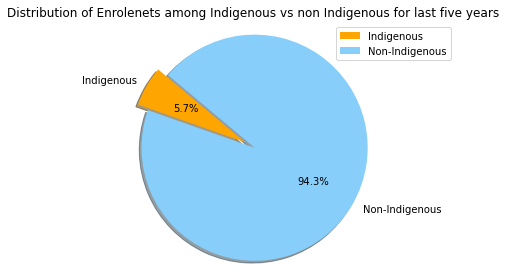

In [44]:
#Result shows in a bar graph
#show pie plot
# Labels for the sections of our pie chart
labels = ["Indigenous", "Non-Indigenous"]

# The values of each section of the pie chart
sizes = [1112942.2, 18347874.9]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes,explode=explode,labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Enrolenets among Indigenous vs non Indigenous for last five years")
plt.axis("equal")
plt.legend()

plt.tight_layout()

In [45]:
#****************In next section trying to get line chart for Indigenous vs non Indigenous by year for last 5 years************

In [46]:
# Get the total Enrolenets among Indigenous vs non Indigenous by year
Group_by_Abriginal_enrolements=Last_five_years_data_df.groupby(["Year"])
#Group_by_Abriginal_enrolements.count()


In [47]:
#Now use the above grouped data to find total enrolements by Affiliation
total_Enrtmnts_by_Year= Group_by_Abriginal_enrolements["FTE Aboriginal and Torres Strait Islander Students ", "FTE Non-Indigenous Students "].sum()
X=total_Enrtmnts_by_Year.reset_index()
X



C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8004/3631666601.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_Enrtmnts_by_Year= Group_by_Abriginal_enrolements["FTE Aboriginal and Torres Strait Islander Students ", "FTE Non-Indigenous Students "].sum()


,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students
0,2016,206728.9,3579687.5
1,2017,214559.4,3625689.9
2,2018,221544.3,3667009.6
3,2019,230290.5,3713420.4
4,2020,239819.1,3762067.5


In [48]:
# Set x axis to numerical value for years
x_axis = np.arange(2016,2021,1)
x_axis

array([2016, 2017, 2018, 2019, 2020])

In [49]:
# Aboriginal enrolemnt numbers
Aboriginal_Enr = [206728.9,214559.4,221544.3,230290.5,239819.1]


In [50]:
# Non-Aboriginal enrolemnt numbers
Non_Aboriginal_Enr = [3579687.5,3625689.9,3667009.6,3713420.4,3762067.5]

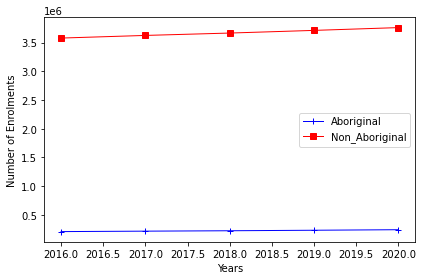

In [51]:
# Create a handle for each plot
Aboriginal_Enrolment, = plt.plot(x_axis, Aboriginal_Enr, marker="+",color="blue", linewidth=1, label="Aboriginal")
Non_Aboriginal_Enrolment, = plt.plot(x_axis, Non_Aboriginal_Enr, marker="s", color="Red", linewidth=1, label="Non_Aboriginal")

# Set our legend to where the chart thinks is best
plt.legend()

# Create labels for the X and Y axis
plt.xlabel("Years")
plt.ylabel("Number of Enrolments")
plt.tight_layout()

In [52]:
#05) monitor enrolment changes over 2006 -2020 for states record highest and lowest enrolments.
#Highest = NSW
#lowest=NT and Tas
#X= 2010 to 2020
 #Y=Number of Enrolments 
# -Linear regression
# -co-relation


In [53]:
NSW_df = data_file1_df[data_file1_df["State/Territory"] == 'NSW']
Groupby_NSW_df=NSW_df.groupby(["Year"])
NSW_Enrolements=Groupby_NSW_df["FTE All Students "].sum()
NSW=NSW_Enrolements.reset_index()
NSW

,Year,FTE All Students
0,2006,1110315.6
1,2007,1110457.6
2,2008,1109949.5
3,2009,1112168.8
4,2010,1120429.7
5,2011,1129749.2
6,2012,1138990.3
7,2013,1154159.0
8,2014,1168320.8
9,2015,1181605.3


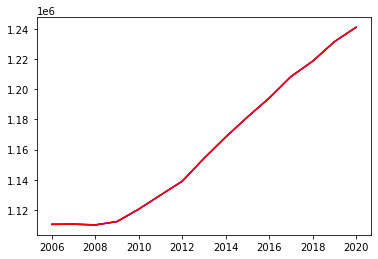

In [54]:
time = np.arange(2006,2021,1)
NSW_line=NSW["FTE All Students "]
NT_line=NSW["FTE All Students "]
Tas_line=NSW["FTE All Students "]

plt.plot(time, NSW_line, color="red", label="NSW")
plt.plot(time, NT_line, color="blue", label="NT")
plt.plot(time, Tas_line, color="red", label="Tas")

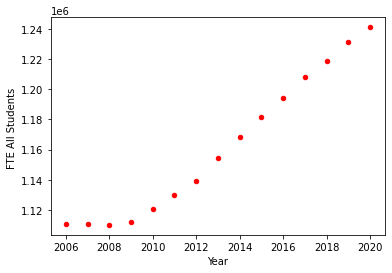

In [55]:
NSW.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'red')
plt.show()

In [56]:
NT_df = data_file1_df[data_file1_df["State/Territory"] == 'NT']
Groupby_NT_df=NT_df.groupby(["Year"])
NT_Enrolements=Groupby_NT_df["FTE All Students "].sum()
NT=NT_Enrolements.reset_index()
NT

,Year,FTE All Students
0,2006,38057.9
1,2007,38609.6
2,2008,39217.0
3,2009,38632.8
4,2010,39352.4
5,2011,39417.8
6,2012,39962.9
7,2013,40485.5
8,2014,40749.2
9,2015,40552.8


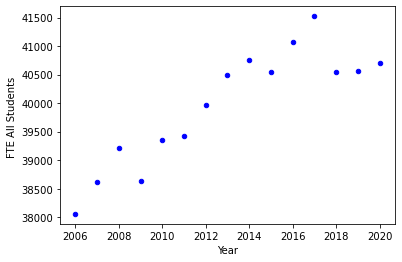

In [57]:
NT.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'Blue')
plt.show()

In [58]:
Tas_df = data_file1_df[data_file1_df["State/Territory"] == 'Tas.']
Groupby_Tas_df=Tas_df.groupby(["Year"])
Tas_Enrolements=Groupby_Tas_df["FTE All Students "].sum()
Tas=Tas_Enrolements.reset_index()
Tas

,Year,FTE All Students
0,2006,83435.7
1,2007,82811.7
2,2008,82465.9
3,2009,82092.7
4,2010,82051.6
5,2011,82157.2
6,2012,81381.1
7,2013,80405.9
8,2014,80700.7
9,2015,80606.4


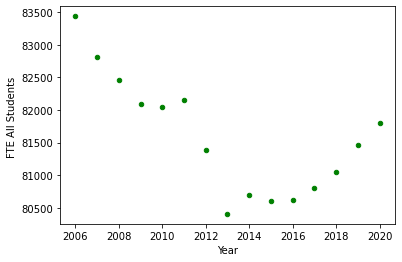

In [59]:
Tas.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'Green')
plt.show()

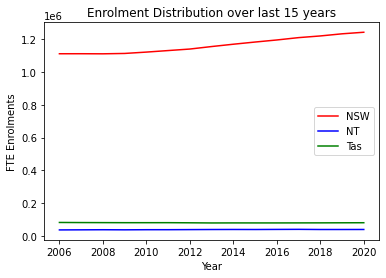

In [60]:
time = np.arange(2006,2021,1)
NSW_line=NSW["FTE All Students "]
NT_line=NT["FTE All Students "]
Tas_line=Tas["FTE All Students "]

plt.plot(time, NSW_line, color="red", label="NSW")
plt.plot(time, NT_line, color="blue", label="NT")
plt.plot(time, Tas_line, color="green", label="Tas")

# Add labels to X and Y axes :: Add title
plt.title("Enrolment Distribution over last 15 years")
plt.xlabel("Year")
plt.ylabel("FTE Enrolments")

# Create a legend for the chart
plt.legend()

In [61]:
#Apply Heat Maps to the Enrolments

In [62]:
Y.reset_index("State/Territory")

,State/Territory,FTE All Students
0,NT,204403.0
1,ACT,354313.8
2,Tas.,405733.5
3,SA,1343161.1
4,WA,2091911.8
5,Qld,4115583.8
6,Vic.,4851464.7
7,NSW,6094245.4


In [63]:
import seaborn as sns
%matplotlib inline

idx= ['NT','ACT','Tas.','SA','WA','Qld','Vic.','NSW']

cols=["FTE All Students "]
df =pd.DataFrame(abs(np.random.randn(8,1)), index=idx, columns=cols)

df.style.background_gradient(cmap='Blues')



,FTE All Students
NT,0.066203
ACT,0.460398
Tas.,0.242375
SA,0.467907
WA,0.264273
Qld,1.824644
Vic.,0.763200
NSW,0.006272


In [64]:

#********************comparing population by state statistics with school enrolments by state****************

In [65]:
#Retrieve this spread sheet from "https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release"
## Read the Full-time Equivalent Students, 2006-2020  data file
data_file2_df = pd.read_excel(data_file2)

# Display the data table for preview
data_file2_df.head(10)

,State/Territory,Population at 30 June 2020,Change over previous year,Change over previous year (%)
0,NSW,8164100,76.7,0.9
1,Vic.,6694900,98.0,1.5
2,Qld,5174400,80.6,1.6
3,SA,1769300,16.6,0.9
4,WA,2661900,38.7,1.5
5,Tas.,540600,6.0,1.1
6,NT,246000,-0.2,-0.1
7,ACT,431100,4.8,1.1


In [66]:
data_file2_df.dtypes

State/Territory                   object
Population at 30 June 2020         int64
Change over previous year        float64
Change over previous year (%)    float64
dtype: object

In [67]:
# Delete extraneous column
del data_file2_df['Change over previous year']
data_file2_df.head()

,State/Territory,Population at 30 June 2020,Change over previous year (%)
0,NSW,8164100,0.9
1,Vic.,6694900,1.5
2,Qld,5174400,1.6
3,SA,1769300,0.9
4,WA,2661900,1.5


In [68]:
# Delete extraneous column
del data_file2_df['Change over previous year (%)']
data_file2_df.head()

,State/Territory,Population at 30 June 2020
0,NSW,8164100
1,Vic.,6694900
2,Qld,5174400
3,SA,1769300
4,WA,2661900


In [69]:
#Filter the data to get 2020 Enrolments
Twentytwenty_data_df = converted_data_file1_df.loc[(converted_data_file1_df["Year"] == "2020")]
Twentytwenty_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
922,2020,ACT,Non-government,Independent,Full-time,Female,School,School,9,13.0,516.0,529.0
923,2020,ACT,Non-government,Independent,Full-time,Female,School,School,10,6.0,478.0,484.0
924,2020,ACT,Non-government,Independent,Full-time,Female,School,School,11,4.0,413.0,417.0
925,2020,ACT,Non-government,Independent,Full-time,Female,School,School,12,7.0,377.0,384.0


In [70]:
Group_by_Twentytwenty = Twentytwenty_data_df.groupby(['State/Territory'])
Group_by_Twentytwenty.count()

,Year,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
State/Territory,,,,,,,,,,,
ACT,92,92,92,92,92,92,92,92,92,92,92
NSW,108,108,108,108,108,108,108,108,108,108,108
NT,105,105,105,105,105,105,105,105,105,105,105
Qld,131,131,131,131,131,131,131,131,131,131,131
SA,131,131,131,131,131,131,131,131,131,131,131
Tas.,105,105,105,105,105,105,105,105,105,105,105
Vic.,158,158,158,158,158,158,158,158,158,158,158
WA,97,97,97,97,97,97,97,97,97,97,97


In [71]:
#Find the total number of Enrolements by state for last five years. 
total_Enrolments_by_State= Group_by_Twentytwenty['FTE All Students '].sum()
#Y=total_Enrolments_by_State.sort_values()
total_Enrolments_by_State.reset_index()

,State/Territory,FTE All Students
0,ACT,74123.6
1,NSW,1241232.0
2,NT,40709.6
3,Qld,856686.2
4,SA,272756.0
5,Tas.,81800.2
6,Vic.,1004951.8
7,WA,429627.2


In [72]:
#Merge two tables
merge_df = pd.merge(data_file2_df, total_Enrolments_by_State, on="State/Territory")
merge_df

,State/Territory,Population at 30 June 2020,FTE All Students
0,NSW,8164100,1241232.0
1,Vic.,6694900,1004951.8
2,Qld,5174400,856686.2
3,SA,1769300,272756.0
4,WA,2661900,429627.2
5,Tas.,540600,81800.2
6,NT,246000,40709.6
7,ACT,431100,74123.6


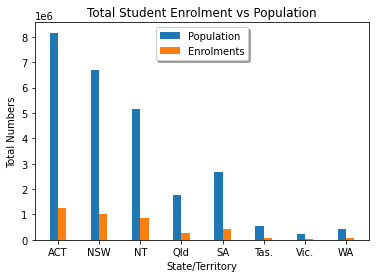

<Figure size 432x288 with 0 Axes>

In [74]:
x=["ACT","NSW","NT","Qld","SA","Tas.","Vic.","WA"]
w=0.2

Population=[8164100,6694900,5174400,1769300,2661900,540600,246000,431100]
Enrolments=[1241232,1004951.8,856686.2,272756,429627.2,81800.2,40709.6,74123.6]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]


plt.bar(bar1,Population,w,label="Population")
plt.bar(bar2,Enrolments,w,label="Enrolments")


plt.xlabel("State/Territory")
plt.ylabel("Total Numbers")
plt.title('Total Student Enrolment vs Population')
plt.xticks(bar1+w/2,x)
plt.legend(('Population','Enrolments'),loc='upper center', shadow=True)
plt.show()
plt.tight_layout()